In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import random

In [2]:
df = pd.read_csv("homeprices_banglore.csv")
df.sample(5)

,area,bedrooms,price
12,1000,2,38.00
11,2785,4,140.00
6,2732,4,135.00
0,1056,2,39.07
17,1540,3,60.00


In [3]:
df.describe()

,area,bedrooms,price
count,20.000000,20.000000,20.000000
mean,1821.450000,2.900000,78.853500
std,864.615794,0.967906,43.761901
min,800.000000,1.000000,32.000000
25%,1173.750000,2.000000,41.500000
50%,1480.500000,3.000000,61.000000
75%,2633.000000,3.250000,106.500000
max,3700.000000,5.000000,167.000000


In [4]:
df.shape

(20, 3)

In [5]:
X = df.drop('price', axis=1).values
Y = df.price.values.reshape(df.shape[0],1) # ma trận (20x1)
X.shape, Y.shape

((20, 2), (20, 1))

In [6]:
scalerX = MinMaxScaler()
scalerY = MinMaxScaler()
X_scaled = scalerX.fit_transform(X)
Y_scaled = scalerY.fit_transform(Y)

In [7]:
X_scaled

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [8]:
random_index = random.randint(0,20-1)
X_scaled2 = X_scaled[19].reshape(1,-1)
X_scaled2

array([[0., 0.]])

In [9]:
Y_scaled2 = Y_scaled[random_index].reshape(1,-1)
Y_scaled2

array([[0.14074074]])

# Stochastic gradien descent

In [10]:
def stochastic_gradient_descent(X, y_true, epochs):
    import numpy as np
    import random
    
    features = X.shape[1]
    samples = X.shape[0]
    w = np.ones(shape=(features, 1)) # matrix (2x1)
    bias = 0
    learning_rate = 0.01
    
    list_loss = []
    list_epoch = []
    list_w = []
    list_bias = []
    
    for i in range(epochs):
        random_index = random.randint(0,samples-1)
        X_sample = X[random_index].reshape(1,-1)
        y_true_sample = y_true[random_index].reshape(1,-1)
        
        weighted_sum = (X_sample @ w) + bias # (1x2) @ (2x1) + (1x1) = (1x1)
        y_pred = weighted_sum
        
        loss = np.mean(np.square(y_true_sample - y_pred))
        
        if i%10==0:
            list_loss.append(loss)
            list_epoch.append(i)
            list_w.append(w)
            list_bias.append(bias)
        
        # adjust
        d_w = (-2/samples) * (X_sample.T @ (y_true_sample - y_pred)) # (2x1) @ (1x1) = (2x1)
        d_bias = (-2/samples) * np.sum(y_true_sample - y_pred)
        
        w = w - learning_rate * d_w  # returns matrix (2x1)
        bias = bias - learning_rate * d_bias
    
    return w, bias, loss, list_loss, list_epoch, list_w, list_bias

In [23]:
w, bias, loss, list_loss, list_epoch, list_w, list_bias = stochastic_gradient_descent(X_scaled, Y_scaled,5000)
w, bias, loss

(array([[0.76152643],
        [0.73159333]]),
 -0.28051573665428425,
 0.005372499511800536)

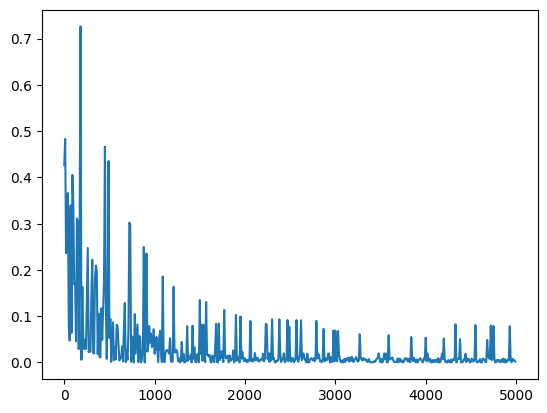

In [24]:
plt.plot(list_epoch, list_loss)

In [13]:
def predict(X, w, bias):
    weighted_sum = np.dot(X, w) + bias
    y_pred = weighted_sum
    return y_pred

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_scaled, train_size=0.7, random_state=0)

In [15]:
yp_test = predict(X_test,w,bias)

In [16]:
scalerY.inverse_transform(yp_test)

array([[110.81274258],
       [127.91180429],
       [  1.00573805],
       [ 63.02531124],
       [ 79.06355874],
       [ 70.55346823]])

In [17]:
scalerY.inverse_transform(y_test)

array([[102.],
       [120.],
       [ 32.],
       [ 50.],
       [ 82.],
       [ 60.]])

In [18]:
X_scaled

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [19]:
scalerX.inverse_transform([[0.62068966, 0.75], [0.22068966, 0.5] ])

array([[2600.000014,    4.      ],
       [1440.000014,    3.      ]])

In [20]:
z = predict([[0.62068966, 0.75], [0.22068966, 0.5]],w,bias)
z

array([[0.71045781],
       [0.26133598]])

In [21]:
scalerY.inverse_transform(z)

array([[127.91180475],
       [ 67.28035695]])

In [22]:
df

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00
5,1170,2,38.00
6,2732,4,135.00
7,3300,4,155.00
8,1310,3,50.00
9,3700,5,167.00
